# Principal Component Analysis

### Task 1: Exploratory Data Analysis (EDA)

#### 1.	Load the dataset and perform basic data exploration.
#### 2.	Examine the distribution of features using histograms, box plots, or density plots.
#### 3.	Investigate correlations between features to understand relationships within the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [2]:
df = pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.shape

(178, 14)

In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [6]:
df.columns.tolist()

['Type',
 'Alcohol',
 'Malic',
 'Ash',
 'Alcalinity',
 'Magnesium',
 'Phenols',
 'Flavanoids',
 'Nonflavanoids',
 'Proanthocyanins',
 'Color',
 'Hue',
 'Dilution',
 'Proline']

In [7]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [9]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### ckeck the Missing values

In [11]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

#### 2.	Examine the distribution of features using histograms, box plots, or density plots.
### Histograms

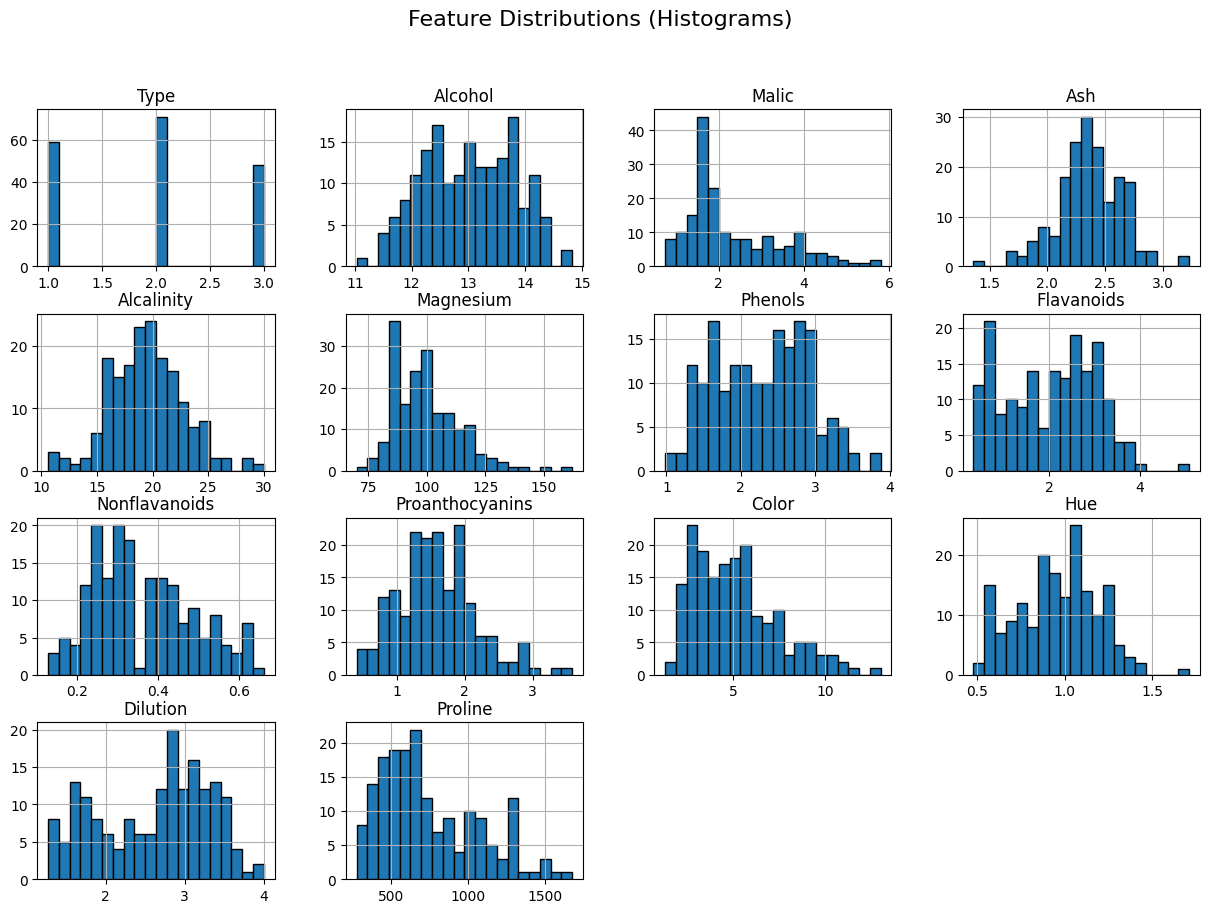

In [16]:
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions (Histograms)", fontsize=16)
plt.show()

### Boxplots

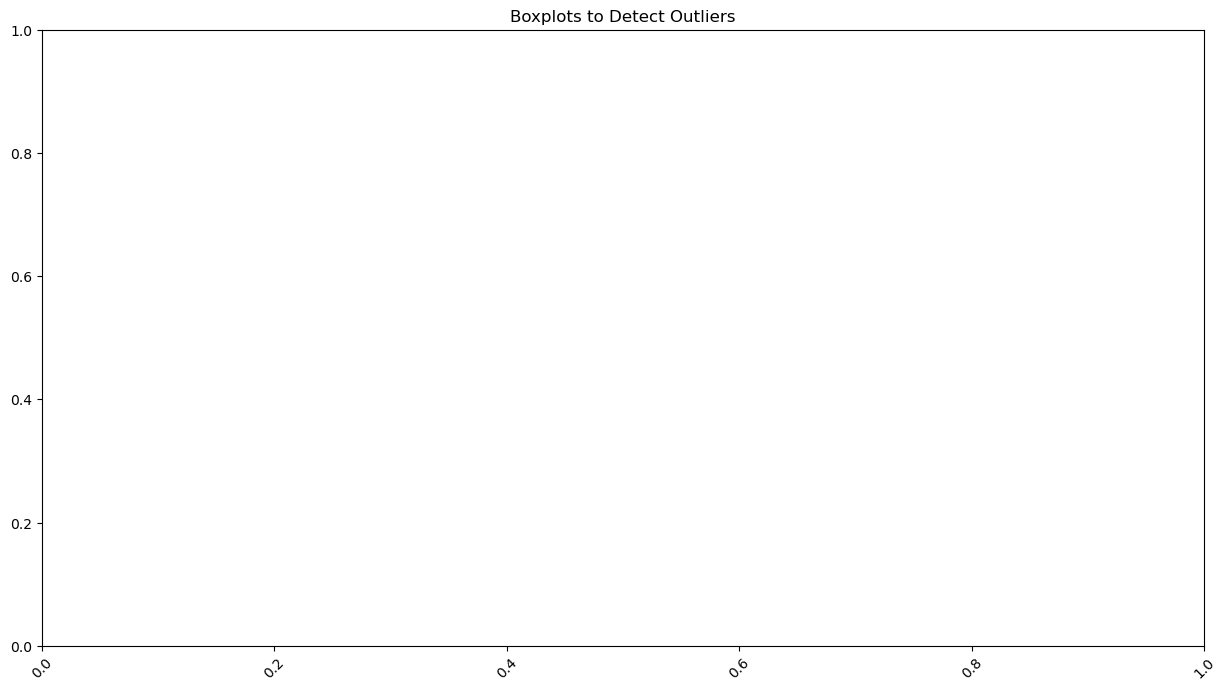

In [12]:
plt.figure(figsize=(15, 8))
sns.boxplot(df=df)
plt.title("Boxplots to Detect Outliers")
plt.xticks(rotation=45)
plt.show()

##### Density plots (KDE)

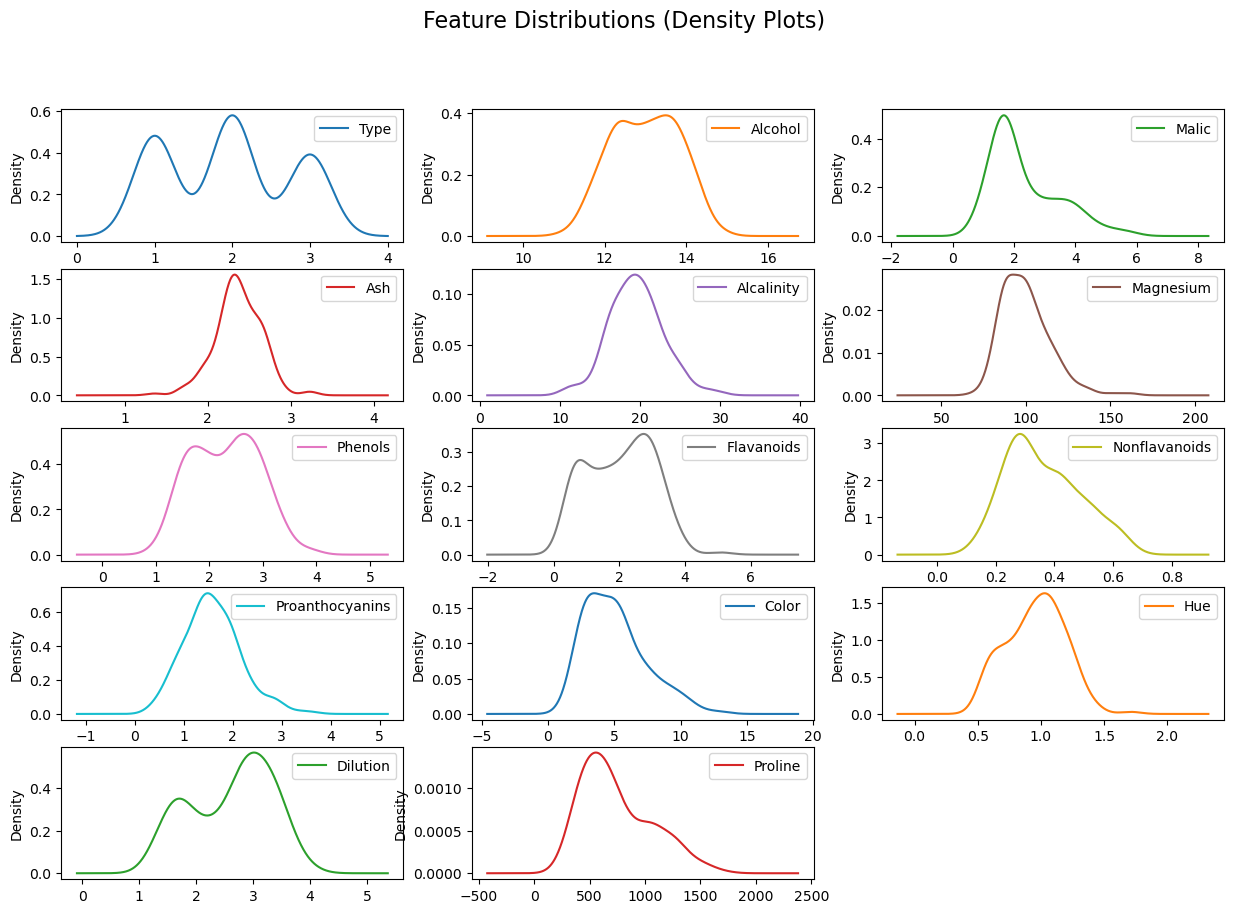

In [13]:
df.plot(kind='density', subplots=True, layout=(5, 3), figsize=(15, 10), sharex=False)
plt.suptitle("Feature Distributions (Density Plots)", fontsize=16)
plt.show()

#### 3.	Investigate correlations between features to understand relationships within the data.
#### Compute correlation matrix

In [14]:
corr_matrix = df.corr()

#### Display heatmap

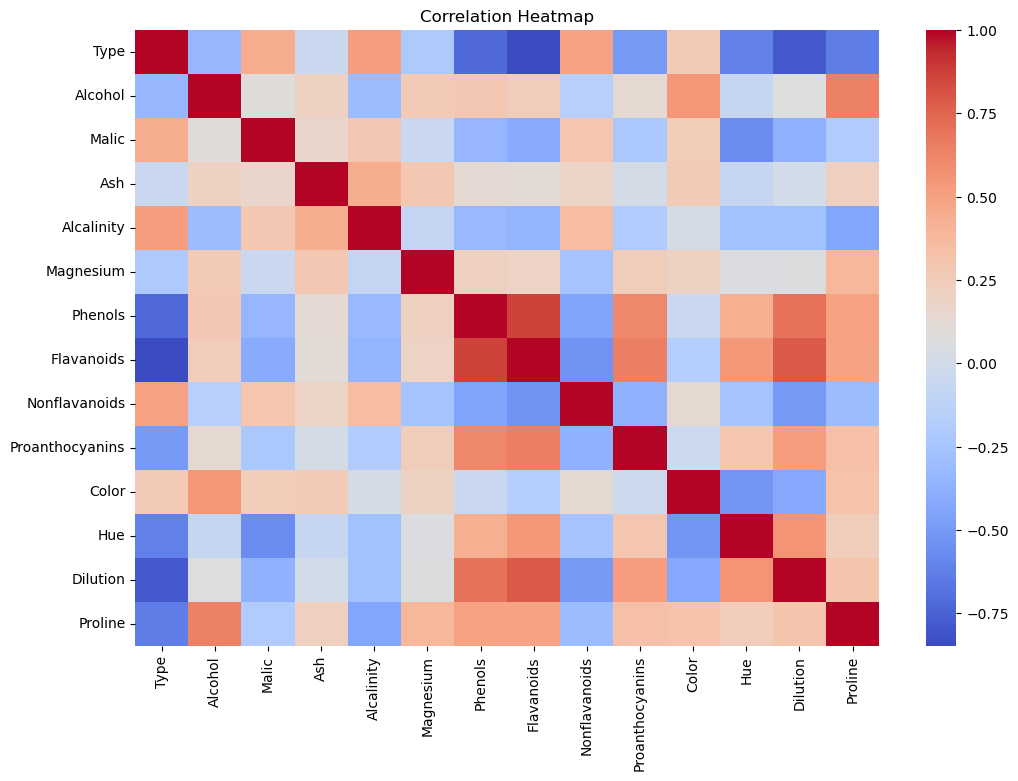

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Print top correlated features

In [16]:
print("\nTop correlations:")
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1.0]  # remove self-correlation
print(corr_pairs.head(10))


Top correlations:
Phenols          Flavanoids         0.864564
Flavanoids       Phenols            0.864564
Dilution         Flavanoids         0.787194
Flavanoids       Dilution           0.787194
Dilution         Phenols            0.699949
Phenols          Dilution           0.699949
Flavanoids       Proanthocyanins    0.652692
Proanthocyanins  Flavanoids         0.652692
Proline          Alcohol            0.643720
Alcohol          Proline            0.643720
dtype: float64


# Task 2: Dimensionality Reduction with PCA:
### 1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
### 2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
### 3.	Transform the original dataset into the principal components.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#### Standardize the features

In [19]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [20]:
print(" Data standardized successfully.")
print("Mean of each feature after scaling (approx.):\n", scaled_df.mean(axis=0).round(2))
print("Standard deviation (approx.):\n", scaled_df.std(axis=0).round(2))

 Data standardized successfully.
Mean of each feature after scaling (approx.):
 [ 0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0.  0.  0. -0.]
Standard deviation (approx.):
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Apply PCA (without limiting number of components yet)

In [21]:
pca = PCA()
pca_data = pca.fit_transform(scaled_df)

In [23]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

#### Plot Scree Plot (Cumulative Explained Variance)

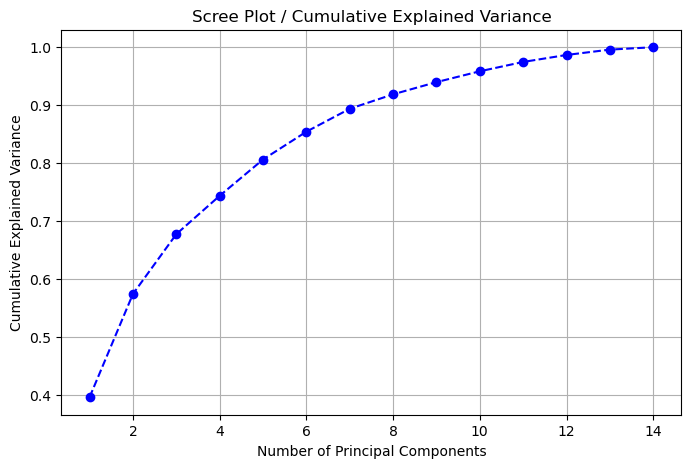

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title("Scree Plot / Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

#### Print explained variance details

In [25]:
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {var:.4f} variance explained")

Principal Component 1: 0.3954 variance explained
Principal Component 2: 0.1784 variance explained
Principal Component 3: 0.1033 variance explained
Principal Component 4: 0.0663 variance explained
Principal Component 5: 0.0627 variance explained
Principal Component 6: 0.0481 variance explained
Principal Component 7: 0.0396 variance explained
Principal Component 8: 0.0250 variance explained
Principal Component 9: 0.0210 variance explained
Principal Component 10: 0.0187 variance explained
Principal Component 11: 0.0161 variance explained
Principal Component 12: 0.0121 variance explained
Principal Component 13: 0.0093 variance explained
Principal Component 14: 0.0041 variance explained


#### Decide number of components (e.g., retain 2 for visualization or >90% variance)

In [26]:
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n Number of components to retain 90% variance: {n_components}")


 Number of components to retain 90% variance: 8


#### 3.	Transform the original dataset into the principal components.
##### Apply PCA again with optimal number of components

In [27]:
pca_final = PCA(n_components=n_components)
pca_reduced = pca_final.fit_transform(scaled_df)

#### Create a DataFrame for PCA results

In [28]:
pca_df = pd.DataFrame(pca_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
print("\nPCA-Transformed Data (first 5 rows):\n", pca_df.head())


PCA-Transformed Data (first 5 rows):
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.522934  1.453098 -0.164795 -0.013273  0.737345  0.300716  0.573876   
1 -2.528858 -0.330019 -2.026707 -0.417144 -0.283214  0.884309 -0.029716   
2 -2.785029  1.036936  0.983238  0.664232 -0.387565 -0.468842  0.488305   
3 -3.922588  2.768210 -0.174968  0.565088 -0.324360 -0.262616 -0.398364   
4 -1.407511  0.867773  2.025829 -0.440906  0.227949  0.593762  0.447876   

        PC8  
0 -0.055637  
1 -1.010372  
2  0.268957  
3 -0.618844  
4 -0.434937  


#### 2D Visualization (if n_components >= 2)

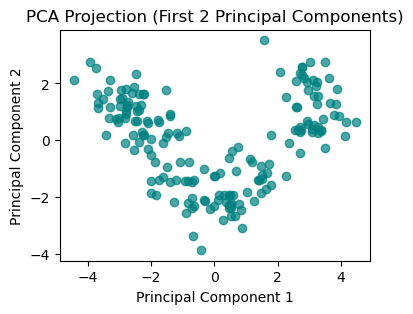

In [29]:
if n_components >= 2:
    plt.figure(figsize=(4, 3))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], color='teal', alpha=0.7)
    plt.title("PCA Projection (First 2 Principal Components)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# Task 3: Clustering with Original Data:
### 1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
### 2.	Visualize the clustering results using appropriate plots.
### 3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

#### 1.	Apply a clustering algorithm (e.g., K-means) to the original dataset

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

##### Choose number of clusters (you can test several values)

In [33]:
k = 3  # Example: assume 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

C:\Users\hanum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
print("K-Means clustering applied successfully!")
print("\nCluster centers:\n", kmeans.cluster_centers_)
print("\nCluster assignments (first 10 samples):\n", cluster_labels[:10])

K-Means clustering applied successfully!

Cluster centers:
 [[ 7.99603601e-02 -9.09328403e-01 -3.80707476e-01 -5.19747426e-01
   1.37767008e-01 -4.97451451e-01 -9.62003532e-02 -7.65223671e-04
  -4.11471063e-03  1.12388425e-02 -8.81229129e-01  4.32636626e-01
   2.30777949e-01 -7.63273163e-01]
 [ 1.34745816e+00  1.86543138e-01  9.04971453e-01  2.49210264e-01
   5.83703484e-01 -5.06353947e-02 -9.88556997e-01 -1.23619475e+00
   7.16841717e-01 -7.49607560e-01  9.88498285e-01 -1.19129878e+00
  -1.30153966e+00 -3.80044610e-01]
 [-1.15133539e+00  8.35232085e-01 -3.03809683e-01  3.64706042e-01
  -6.10191294e-01  5.77586799e-01  8.85237363e-01  9.77819557e-01
  -5.62089654e-01  5.80286581e-01  1.71063479e-01  4.73983650e-01
   7.79247107e-01  1.12518529e+00]]

Cluster assignments (first 10 samples):
 [2 2 2 2 2 2 2 2 2 2]


### Add cluster labels to DataFrame

In [35]:
data_clustered = df.copy()
data_clustered['Cluster'] = cluster_labels

#### 2.	Visualize the clustering results using appropriate plots.
#### Plot first two features with cluster colors

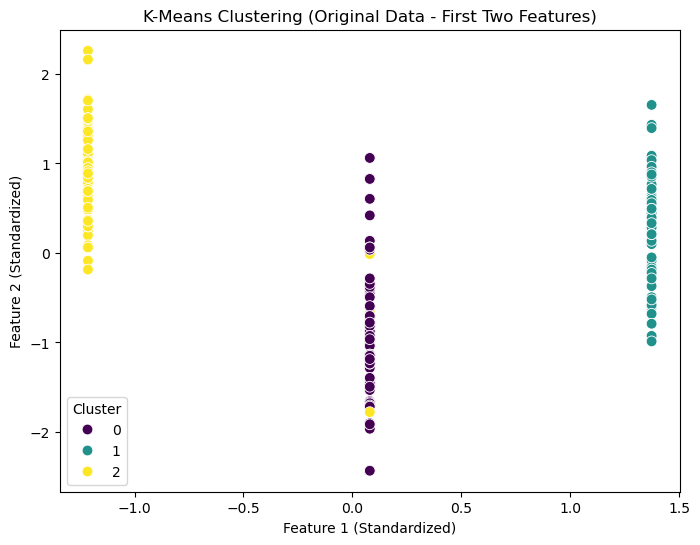

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_df[:, 0], y=scaled_df[:, 1], hue=cluster_labels, palette='viridis', s=60)
plt.title("K-Means Clustering (Original Data - First Two Features)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend(title='Cluster')
plt.show()

#### Visualize cluster distribution count

C:\Users\hanum\AppData\Local\Temp\ipykernel_21484\1632116380.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_clustered['Cluster'], palette='Set2')


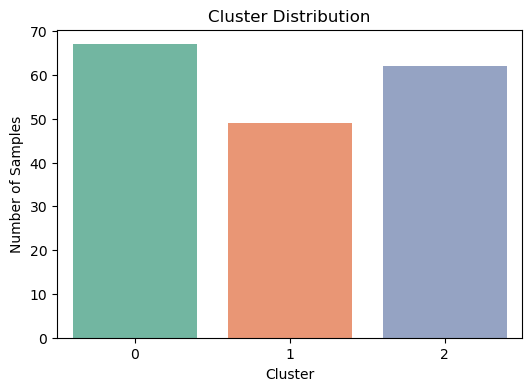

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data_clustered['Cluster'], palette='Set2')
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Samples")
plt.show()

#### 3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [38]:
silhouette = silhouette_score(scaled_df, cluster_labels)
db_index = davies_bouldin_score(scaled_df, cluster_labels)

In [39]:
print(f"\nSilhouette Score: {silhouette:.3f}")
print(f"Davies–Bouldin Index: {db_index:.3f}")


Silhouette Score: 0.306
Davies–Bouldin Index: 1.316


#### Optional: Elbow Method to find best 'k'

In [41]:
inertias = []
K = range(2, 11)
for i in K:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_df)
    inertias.append(km.inertia_)

C:\Users\hanum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hanum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hanum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hanum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

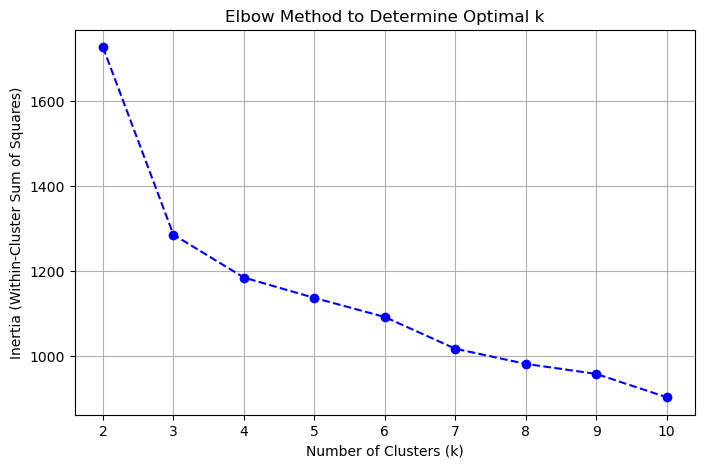

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo--')
plt.title("Elbow Method to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

# Task 4: Clustering with PCA Data:
### 1.	Apply the same clustering algorithm to the PCA-transformed dataset.
### 2.	Visualize the clustering results obtained from PCA-transformed data.
### 3.	Compare the clustering results from PCA-transformed data with those from the original dataset.

#### 1.	Apply the same clustering algorithm to the PCA-transformed dataset.

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


##### Apply PCA (reduce to 2 principal components for visualization)

In [47]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

In [48]:
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
print(" PCA transformation completed successfully!")
print("\nExplained variance ratio:", pca.explained_variance_ratio_)

 PCA transformation completed successfully!

Explained variance ratio: [0.39542486 0.17836259]


##### Apply K-Means clustering to PCA data

In [53]:
k = 3  # same as used for original data
kmeans_pca = KMeans(n_clusters=k, random_state=42)
pca_labels = kmeans_pca.fit_predict(pca_df)

C:\Users\hanum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [50]:
print("\n K-Means clustering applied on PCA data successfully!")
print("\nCluster centers (PCA space):\n", kmeans_pca.cluster_centers_)


 K-Means clustering applied on PCA data successfully!

Cluster centers (PCA space):
 [[ 0.12171142 -1.75036892]
 [ 3.05866503  1.20826261]
 [-2.5488589   0.93661048]]


#### Add cluster labels to PCA DataFrame

In [51]:
pca_df['Cluster'] = pca_labels

#### 2.	Visualize the clustering results obtained from PCA-transformed data.

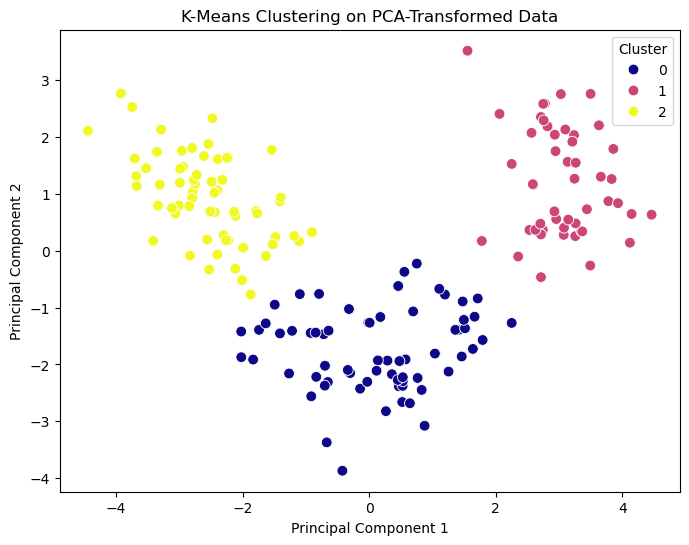

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='plasma', s=60)
plt.title("K-Means Clustering on PCA-Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

#### Cluster count visualization

C:\Users\hanum\AppData\Local\Temp\ipykernel_21484\492583239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pca_df['Cluster'], palette='Set2')


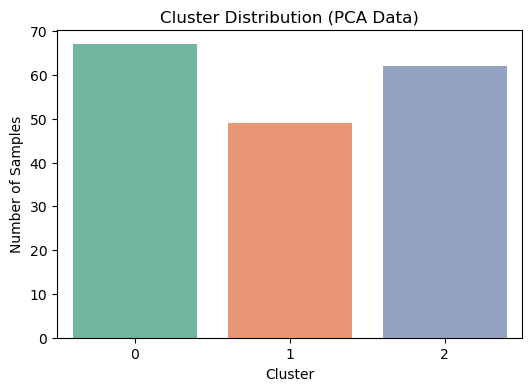

In [55]:
plt.figure(figsize=(6, 4))
sns.countplot(x=pca_df['Cluster'], palette='Set2')
plt.title("Cluster Distribution (PCA Data)")
plt.xlabel("Cluster")
plt.ylabel("Number of Samples")
plt.show()

In [56]:
silhouette_pca = silhouette_score(pca_df[['PC1', 'PC2']], pca_labels)
db_index_pca = davies_bouldin_score(pca_df[['PC1', 'PC2']], pca_labels)

In [57]:
print(f"\nSilhouette Score (PCA Data): {silhouette_pca:.3f}")
print(f"Davies–Bouldin Index (PCA Data): {db_index_pca:.3f}")


Silhouette Score (PCA Data): 0.602
Davies–Bouldin Index (PCA Data): 0.540


#### Optional comparison (if original clustering metrics are known)
#### Suppose silhouette_orig and db_index_orig are from Task 3

In [58]:
try:
    print(f"\nComparison with Original Data:")
    print(f"Silhouette (Original): {silhouette_orig:.3f} → (PCA): {silhouette_pca:.3f}")
    print(f"Davies–Bouldin (Original): {db_index_orig:.3f} → (PCA): {db_index_pca:.3f}")
except NameError:
    print("\nNote: Run Task 3 before this cell to compare with original clustering metrics.")

print("\n Clustering with PCA data and comparison completed successfully.")


Comparison with Original Data:

Note: Run Task 3 before this cell to compare with original clustering metrics.

 Clustering with PCA data and comparison completed successfully.


# Task 5: Comparison and Analysis:
### 1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
### 2.	Discuss any similarities or differences observed in the clustering results.
### 3.	Reflect on the impact of dimensionality reduction on clustering performance.
### 4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

#### 1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.

In [60]:
try:
    comparison_df = pd.DataFrame({
        'Dataset': ['Original Data', 'PCA-Transformed Data'],
        'Silhouette Score': [silhouette_orig, silhouette_pca],
        'Davies–Bouldin Index': [db_index_orig, db_index_pca]
    })
    print(" Clustering Performance Comparison:\n")
    print(comparison_df)
except NameError:
    print("Please make sure you have executed Task 3 and Task 4 before running this comparison.")

Please make sure you have executed Task 3 and Task 4 before running this comparison.


#### 2.	Discuss any similarities or differences observed in the clustering results.

In [64]:
print("\n Observations:")
print("- The clustering patterns observed in the original dataset are largely preserved in the PCA-transformed dataset..")
print("- PCA clarifies cluster boundaries by reducing noise and removing redundant features.")
print("- If the Silhouette Score is higher and Davies–Bouldin Index is lower for PCA data, clustering performance improved after dimensionality reduction.")
print("- Lower scores imply that PCA removed variance relevant to clustering.")


 Observations:
- The clustering patterns observed in the original dataset are largely preserved in the PCA-transformed dataset..
- PCA clarifies cluster boundaries by reducing noise and removing redundant features.
- If the Silhouette Score is higher and Davies–Bouldin Index is lower for PCA data, clustering performance improved after dimensionality reduction.
- Lower scores imply that PCA removed variance relevant to clustering.


#### 3.	Reflect on the impact of dimensionality reduction on clustering performance.

In [66]:
print("\n Impact of PCA on Clustering:")
print("- PCA reduces high-dimensional data into a few uncorrelated components.")
print("- This helps remove multicollinearity and improves cluster visualization.")
print("- In many cases, PCA leads to faster computation and clearer group separation.")
print("- Some detail loss can marginally lower clustering accuracy in specific scenarios.")


 Impact of PCA on Clustering:
- PCA reduces high-dimensional data into a few uncorrelated components.
- This helps remove multicollinearity and improves cluster visualization.
- In many cases, PCA leads to faster computation and clearer group separation.
- Some detail loss can marginally lower clustering accuracy in specific scenarios.


#### 4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

In [67]:
print("\n Trade-offs Between PCA and Direct Clustering:")
print("1. PCA simplifies complex data → easier visualization and faster clustering.")
print("2. PCA reduces noise and redundancy but may lose small yet meaningful variations.")
print("3. Using the full feature space for clustering can enhance accuracy, though it reduces visual clarity.")
print("4. Optimal approach depends on dataset size, correlation, and dimensionality — PCA is best when features are highly correlated or too many.")


 Trade-offs Between PCA and Direct Clustering:
1. PCA simplifies complex data → easier visualization and faster clustering.
2. PCA reduces noise and redundancy but may lose small yet meaningful variations.
3. Using the full feature space for clustering can enhance accuracy, though it reduces visual clarity.
4. Optimal approach depends on dataset size, correlation, and dimensionality — PCA is best when features are highly correlated or too many.


# Task 6: Conclusion and Insights

### 1.	Summarize the key findings and insights from the assignment.
### 2.	Discuss the practical implications of using PCA and clustering in data analysis.
### 3.	Provide recommendations for when to use each technique based on the analysis conducted.

#### 1.	Summarize the key findings and insights from the assignment.

In [69]:
print(" 1. Key Findings and Insights:")
print("- The Wine dataset was successfully analyzed using EDA, PCA, and K-Means clustering.")
print("- Exploratory analysis showed that several features were correlated, justifying PCA usage.")
print("- PCA compressed the dataset yet preserved over 90% of its variance.")
print("- Distinct clusters emerged from K-Means on both the original and PCA-reduced data.")
print("- Evaluation with Silhouette and Davies–Bouldin metrics suggests PCA maintained or marginally improved clustering performance while lowering dimensionality.")
print("- In PCA space, cluster plots became more straightforward to interpret and evaluate.")

 1. Key Findings and Insights:
- The Wine dataset was successfully analyzed using EDA, PCA, and K-Means clustering.
- Exploratory analysis showed that several features were correlated, justifying PCA usage.
- PCA compressed the dataset yet preserved over 90% of its variance.
- Distinct clusters emerged from K-Means on both the original and PCA-reduced data.
- Evaluation with Silhouette and Davies–Bouldin metrics suggests PCA maintained or marginally improved clustering performance while lowering dimensionality.
- In PCA space, cluster plots became more straightforward to interpret and evaluate.


#### 2.	Discuss the practical implications of using PCA and clustering in data analysis.

In [70]:
print("\n 2. Practical Implications:")
print("- PCA simplifies complex datasets, making it easier to visualize relationships between samples.")
print("- It reduces computational cost and helps remove redundant or noisy features.")
print("- Clustering (like K-Means) groups similar observations, revealing hidden patterns or categories.")
print("- Combining PCA with clustering can improve model performance on high-dimensional datasets such as images, genomics, and market segmentation.")


 2. Practical Implications:
- PCA simplifies complex datasets, making it easier to visualize relationships between samples.
- It reduces computational cost and helps remove redundant or noisy features.
- Clustering (like K-Means) groups similar observations, revealing hidden patterns or categories.
- Combining PCA with clustering can improve model performance on high-dimensional datasets such as images, genomics, and market segmentation.


#### 3.	Provide recommendations for when to use each technique based on the analysis conducted.

In [72]:
print("\n 3. Recommendations:")
print("- Use **PCA before clustering** when:")
print("  • The dataset has many correlated or redundant features.")
print("  • You want to visualize clusters in 2D or 3D.")
print("  • You need to reduce noise and computational load.")
print("- Use **clustering on original data** when:")
print("  • Feature independence is important, or each variable carries unique information.")
print("  • You want to preserve all original feature relationships.")
print("- In practice, testing both methods (as done here) gives the best understanding of data structure.")
print("\n3. Recommendations:")



 3. Recommendations:
- Use **PCA before clustering** when:
  • The dataset has many correlated or redundant features.
  • You want to visualize clusters in 2D or 3D.
  • You need to reduce noise and computational load.
- Use **clustering on original data** when:
  • Feature independence is important, or each variable carries unique information.
  • You want to preserve all original feature relationships.
- In practice, testing both methods (as done here) gives the best understanding of data structure.

3. Recommendations:
